**Data Science and Business Analytics** 

**Task #3 Exploratory Data Analysis - Retail**
 
 **by Bhanu Marwah**

In [ ]:
# importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

In [ ]:
# loading the dataset
df = pd.read_csv("/content/SampleSuperstore.csv")
df.head()


,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


Therefore, no column has an empty field.

In [ ]:
df.dtypes      # for checking the type of data that can be added in each column

Ship Mode        object
Segment          object
Country          object
City             object
State            object
Postal Code       int64
Region           object
Category         object
Sub-Category     object
Sales           float64
Quantity          int64
Discount        float64
Profit          float64
dtype: object

In [ ]:
df.isnull().sum()     # finding out total number of missing values

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [ ]:
df.nunique()        # unique value count

Ship Mode          4
Segment            3
Country            1
City             531
State             49
Postal Code      631
Region             4
Category           3
Sub-Category      17
Sales           5825
Quantity          14
Discount          12
Profit          7287
dtype: int64

Since, there is only 1 country so we can eliminate it. Also, there is no need for postal code as well.

In [ ]:
del df['Country']
del df['Postal Code']


In [ ]:
df.head()

,Ship Mode,Segment,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,Los Angeles,California,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,Fort Lauderdale,Florida,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,Fort Lauderdale,Florida,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [ ]:
df['Sales'].describe()

count     9994.000000
mean       229.858001
std        623.245101
min          0.444000
25%         17.280000
50%         54.490000
75%        209.940000
max      22638.480000
Name: Sales, dtype: float64

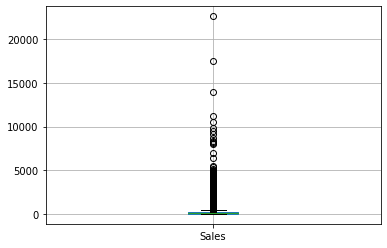

In [ ]:
df.boxplot(column = ['Sales'])

In [ ]:
df['Sales'].skew()    # positively skewed

12.97275234181623

In [ ]:
print(df['Sales'].quantile(0.10))
print(df['Sales'].quantile(0.90))

7.897200000000001
572.7060000000001


In [ ]:
df['Sales'] = np.where(df['Sales']< 7.897200000000001, 7.897200000000001, df['Sales'])
df['Sales'] = np.where(df['Sales']> 572.7060000000001, 572.7060000000001, df['Sales'])
df['Sales'].skew()

1.6470956077335979

In [ ]:
df['Profit'].describe()


count    9994.000000
mean       28.656896
std       234.260108
min     -6599.978000
25%         1.728750
50%         8.666500
75%        29.364000
max      8399.976000
Name: Profit, dtype: float64

In [ ]:
df['Profit'].skew()      # positively skewed

7.561431562468343

In [ ]:
print(df['Profit'].quantile(0.10))
print(df['Profit'].quantile(0.90))

-15.47346
89.28162000000006


In [ ]:
df['Profit'] = np.where(df['Profit']< -15.47346, -15.47346, df['Profit'])
df['Profit'] = np.where(df['Profit']> 89.28162000000006, 89.28162000000006, df['Profit'])
df['Profit'].skew()

1.178540179150995

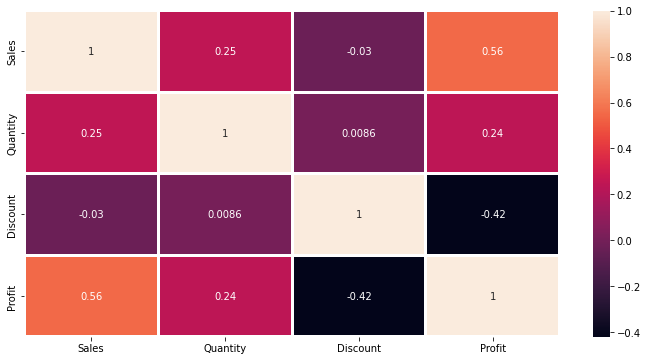

In [ ]:
plt.figure(figsize = (12, 6))
sns.heatmap(df.corr(), annot = True, xticklabels = 'auto', yticklabels = 'auto', linewidth = 2)

Here, Sales and Profit have the correlation of 0.56 i.e., they are positively correlated.

Quantity is also positively correlated with both Sales and Profit.

But, Discount is negatively correlated with Profit.

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'n_uniques = 3 \n value_counts() = Office Supplies    0.602962\nFurniture          0.212227\nTechnology         0.184811\nName: Category, dtype: float64')

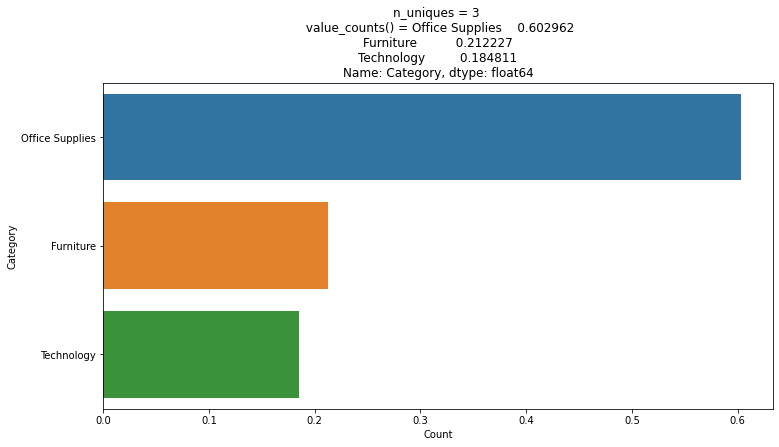

In [ ]:
norm_count = df['Category'].value_counts(normalize = True)
n_uni = df['Category'].nunique()
plt.figure(figsize = (12,6))
sns.barplot(norm_count, norm_count.index, order = norm_count.index )
plt.xlabel('Count')
plt.ylabel('Category')
plt.title('n_uniques = {} \n value_counts() = {}'.format(n_uni, norm_count))


Office Supplies is the highest selling category.

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'n_uniques = 3 \n value_counts() = Consumer       0.519412\nCorporate      0.302181\nHome Office    0.178407\nName: Segment, dtype: float64')

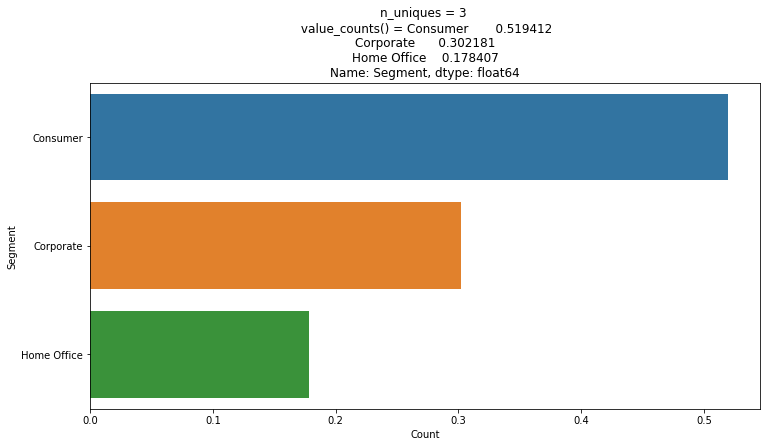

In [ ]:
norm_count = df['Segment'].value_counts(normalize = True)
n_uni = df['Segment'].nunique()
plt.figure(figsize = (12,6))
sns.barplot(norm_count, norm_count.index, order = norm_count.index )
plt.xlabel('Count')
plt.ylabel('Segment')
plt.title('n_uniques = {} \n value_counts() = {}'.format(n_uni, norm_count))

Amonng the segments, Consumers have the highest count and Home Office has the least count.

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f26dbc5cd90>],
      dtype=object)

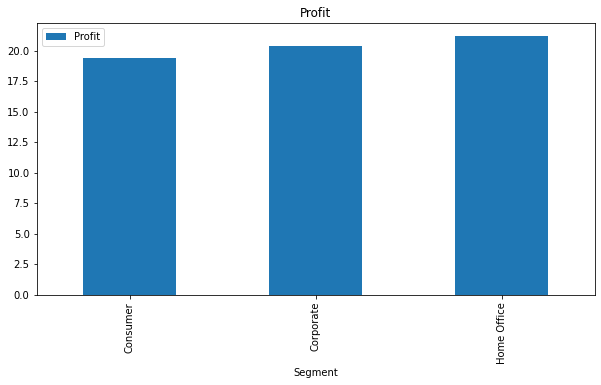

In [ ]:
table = pd.pivot_table(df, values = 'Profit', index = 'Segment')
table.plot(kind = 'bar', subplots = True, figsize = (10,5))

Though Consumers have the highest count among segments but it has the least profit. Home office is the most profitable segment despite the least count.

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f26dbc5c400>],
      dtype=object)

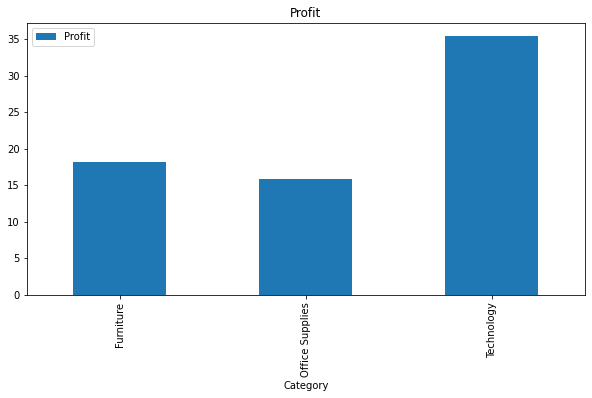

In [ ]:
table = pd.pivot_table(df, values = 'Profit', index = 'Category')
table.plot(kind = 'bar', subplots = True, figsize = (10,5))

Office Supplies have the least profit despite being the highest selling category.

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f26dbb530d0>],
      dtype=object)

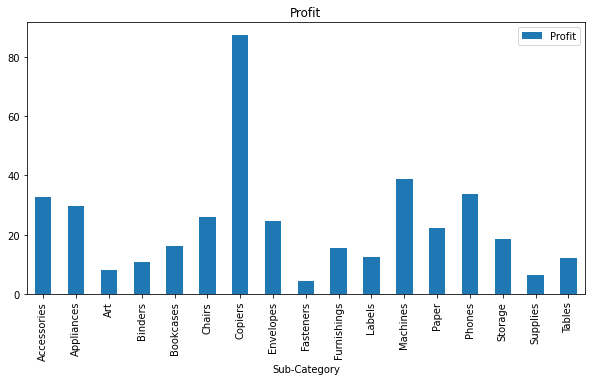

In [ ]:
table = pd.pivot_table(df, values = 'Profit', index = 'Sub-Category')
table.plot(kind = 'bar', subplots = True, figsize = (10,5))

Copiers make the highest profit under sub-categories and Fasteners make the least profit.

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f26db9c8d30>],
      dtype=object)

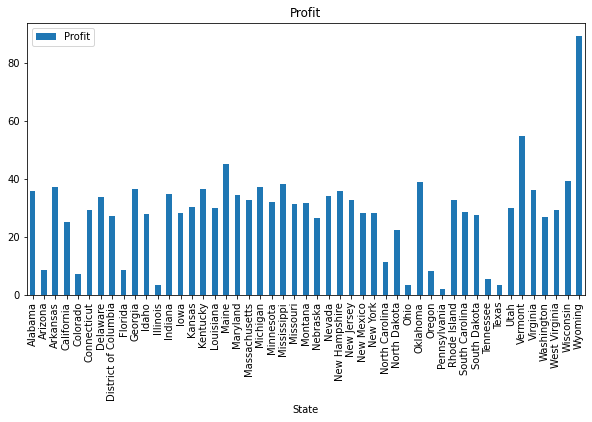

In [ ]:
table = pd.pivot_table(df, values = 'Profit', index = 'State')
table.plot(kind = 'bar', subplots = True, figsize = (10,5))

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f36221c26a0>],
      dtype=object)

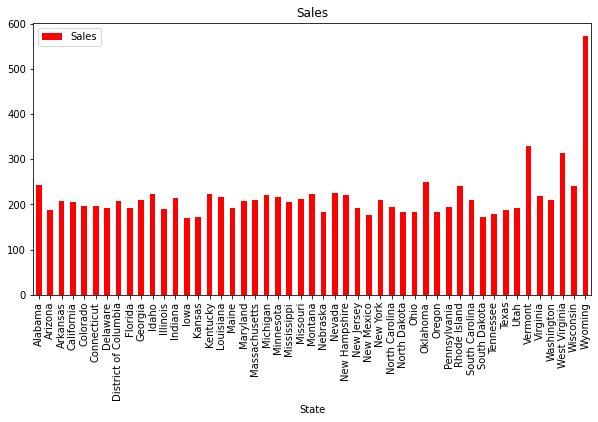

In [ ]:
table = pd.pivot_table(df, values = 'Sales', index = 'State')
table.plot(kind = 'bar', color = 'red', subplots = True, figsize = (10,5))

Wyoming is the state with the highest sales.
By comparing the above two graphs, we can see that Texas, Pennsylvania, Illinois and Ohio are the states with relatively good sales but least profit.

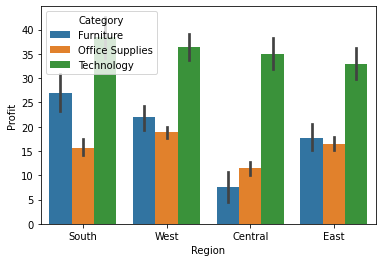

In [ ]:
sns.barplot(data = df, x = 'Region', y = 'Profit', hue = 'Category')
plt.show()

It is clear from the above chart that the least profit of Furniture and Office Supplies is in the Central region.

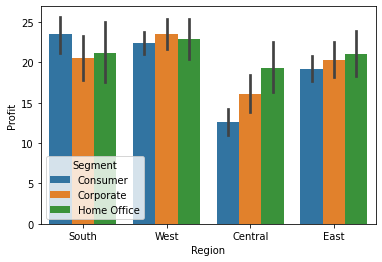

In [ ]:
sns.barplot(data = df, x = 'Region', y = 'Profit', hue = 'Segment')
plt.show()

It is again visible that Central Region has the least profit in terms of segments also.

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


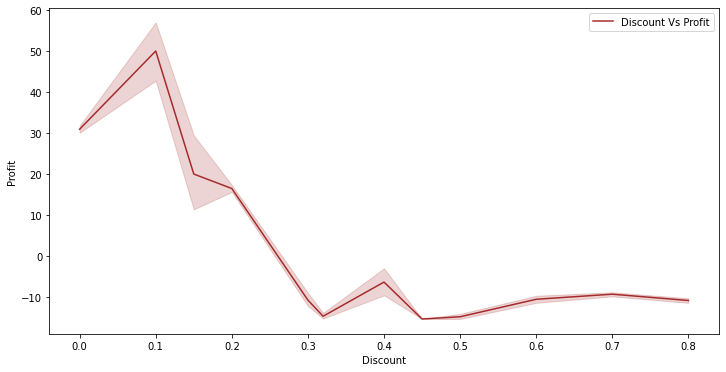

In [ ]:
plt.figure(figsize = (12,6))
sns.lineplot('Discount', 'Profit', data = df, color = 'brown', label = 'Discount Vs Profit')

As the discount increases the profit decreases. 

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


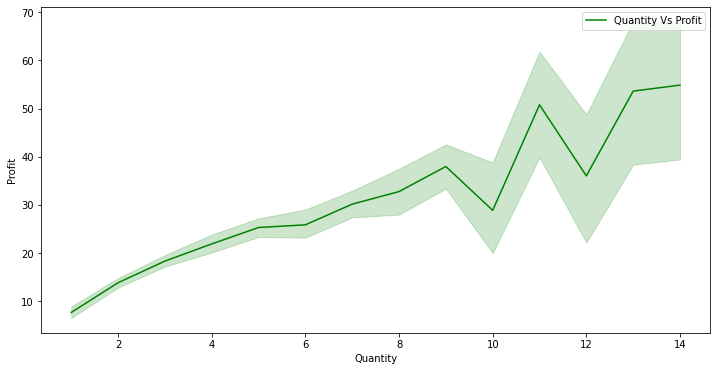

In [ ]:
plt.figure(figsize = (12,6))
sns.lineplot('Quantity', 'Profit', data = df, color = 'green', label = 'Quantity Vs Profit')

**Conclusion:**
1. Giving discount incures some losses but are manageable.
2. Office Supplies and Furniture are the categories to be looked upon for low profits.
3. Central and East region are the ones with least profit.
4. Among the states, Texas, Pennsylvania, Illinois and Ohio have the least profit inspite of having good sales.
5. Under the Office Supplies category, Supplies, Appliances and Binders are making losses in the Central region.
6. Tables are making huge losses in the East region.
7. Furnishing, Tables and Bookcases are making huge losses in the Central region.

